### Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import streamlit as st

In [2]:
import matplotlib
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [3]:
%matplotlib inline

### Given Data Set

In [4]:
df=pd.read_csv("E:\Downloads_E\crop_production.csv")

In [5]:
df

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


In [7]:
df.describe()

,Crop_Year,Area,Production
count,246091.000000,2.460910e+05,2.423610e+05
mean,2005.643018,1.200282e+04,5.825034e+05
std,4.952164,5.052340e+04,1.706581e+07
min,1997.000000,4.000000e-02,0.000000e+00
25%,2002.000000,8.000000e+01,8.800000e+01
50%,2006.000000,5.820000e+02,7.290000e+02
75%,2010.000000,4.392000e+03,7.023000e+03
max,2015.000000,8.580100e+06,1.250800e+09


### There are missing values lets do some data manipulation techniques using Transform & Fillna()

In [8]:
df.loc[df.Production.isnull(),'Production']=df.groupby(['Crop_Year','Crop']).Production.transform('mean')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     246035 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


In [10]:
df.describe()

,Crop_Year,Area,Production
count,246091.000000,2.460910e+05,2.460350e+05
mean,2005.643018,1.200282e+04,5.843780e+05
std,4.952164,5.052340e+04,1.696752e+07
min,1997.000000,4.000000e-02,0.000000e+00
25%,2002.000000,8.000000e+01,9.100000e+01
50%,2006.000000,5.820000e+02,7.670000e+02
75%,2010.000000,4.392000e+03,7.099500e+03
max,2015.000000,8.580100e+06,1.250800e+09


In [11]:
df['Production']=df['Production'].fillna(df['Production'].median())

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     246091 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


In [13]:
df.describe()

,Crop_Year,Area,Production
count,246091.000000,2.460910e+05,2.460910e+05
mean,2005.643018,1.200282e+04,5.842452e+05
std,4.952164,5.052340e+04,1.696559e+07
min,1997.000000,4.000000e-02,0.000000e+00
25%,2002.000000,8.000000e+01,9.100000e+01
50%,2006.000000,5.820000e+02,7.670000e+02
75%,2010.000000,4.392000e+03,7.095500e+03
max,2015.000000,8.580100e+06,1.250800e+09


In [14]:
df.to_csv('datasource1.csv')

### Crop Production and Area in Different States for following years

In [15]:
df_grouped=df.groupby(['State_Name','Crop_Year']).sum()

In [16]:
df_grouped

Area    Production
State_Name                  Crop_Year                          
Andaman and Nicobar Islands 2000         44518.00  8.906091e+07
                            2001         41163.00  8.971870e+07
                            2002         45231.40  9.438714e+07
                            2003         44799.40  9.529645e+07
                            2004         45308.77  8.718650e+07
...                                           ...           ...
West Bengal                 2010       7246877.00  3.831042e+07
                            2011       7755360.00  3.677777e+07
                            2012       7850937.00  3.891880e+07
                            2013       7999815.00  3.790128e+07
                            2014       8058390.00  4.358440e+07

[519 rows x 2 columns]

In [17]:
df_grouped.sort_values('Production',ascending=False).head(30)

Area    Production
State_Name     Crop_Year                          
Kerala         2005       1818834.00  6.330169e+09
Tamil Nadu     2011       4933432.00  6.262548e+09
Kerala         2006       1738085.00  6.058022e+09
               2004       1829339.00  6.005574e+09
               2014       1418145.06  5.957111e+09
               2011       1428147.88  5.950674e+09
               2013       1519805.29  5.928720e+09
               2003       2106924.00  5.880854e+09
               2008       1530898.00  5.809109e+09
               2012       1626602.00  5.805941e+09
               2002       2816545.00  5.714484e+09
               1999       1877931.00  5.684607e+09
               2009       1517689.00  5.674220e+09
               2007       1589023.00  5.645030e+09
               2000       1888426.00  5.540266e+09
               2001       2445363.00  5.483835e+09
               2010       1442320.10  5.294829e+09
               1998       1814763.00  5.136509e+09
Tamil Nadu     2013       5020615.00  4.719724e+09
Andhra Pradesh 2014       9394114.00  2.132304e+09
               2012       7223207.00  1.701208e+09
               2013       7762961.00  1.645887e+09
               2011       7069446.00  1.452126e+09
               2006       6940458.00  1.346469e+09
               2004       7507400.00  1.215047e+09
               2003       7371057.00  1.209796e+09
               2002       6978033.00  1.171738e+09
               2009       6656622.00  1.166340e+09
               2001       7197047.00  1.140160e+09
               2000       7589359.00  1.109142e+09

### Areble Land and Production Overview with respect to Year

In [18]:
df_grouped_year=df.groupby(['Crop_Year']).sum()

In [19]:
df_grouped_year

,Area,Production
Crop_Year,,
1997,2.317150e+08,8.512329e+08
1998,1.669881e+08,5.829925e+09
1999,1.586661e+08,6.435288e+09
2000,1.652975e+08,7.452538e+09
2001,1.652956e+08,7.466377e+09
2002,1.577690e+08,7.697426e+09
2003,1.720881e+08,7.919619e+09
2004,1.678784e+08,8.194149e+09
2005,1.631364e+08,8.114927e+09


### What is the total Crop Production in India?
(in Tonnes)

In [20]:
df_grouped_year.Production.sum()

143777494650.49164

### What is the total Areble land in India?
(in Hectares)

In [21]:
df_grouped_year.Area.sum()

2953786189.17

In [22]:
df.head(30)

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.00
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.00
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.00
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.00
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.00
5,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Coconut,18168.0,65100000.00
6,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Dry ginger,36.0,100.00
7,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Sugarcane,1.0,2.00
8,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Sweet potato,5.0,15.00
9,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Tapioca,40.0,169.00


In [23]:
df[df.State_Name=='Andaman and Nicobar Islands'].Production.sum()

718236874.3192813

In [24]:
df.loc[(df.State_Name=='Andaman and Nicobar Islands') & (df.Crop_Year==2000)]

2021-09-25 11:23:56.345 INFO    numexpr.utils: NumExpr defaulting to 8 threads.


,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
5,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Coconut,18168.0,65100000.0
6,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Dry ginger,36.0,100.0
7,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Sugarcane,1.0,2.0
8,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Sweet potato,5.0,15.0
9,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Tapioca,40.0,169.0


In [25]:
df.loc[(df.State_Name=='Andaman and Nicobar Islands') & (df.Crop_Year>2005)]

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
53,Andaman and Nicobar Islands,NICOBARS,2006,Whole Year,Arecanut,896.00,477.60
54,Andaman and Nicobar Islands,NICOBARS,2006,Whole Year,Banana,198.00,976.00
55,Andaman and Nicobar Islands,NICOBARS,2006,Whole Year,Black pepper,22.16,0.68
56,Andaman and Nicobar Islands,NICOBARS,2006,Whole Year,Cashewnut,450.00,85.13
57,Andaman and Nicobar Islands,NICOBARS,2006,Whole Year,Coconut,14358.00,59370000.00
...,...,...,...,...,...,...,...
198,Andaman and Nicobar Islands,SOUTH ANDAMANS,2010,Rabi,Turmeric,10.00,105.00
199,Andaman and Nicobar Islands,SOUTH ANDAMANS,2010,Rabi,Urad,34.00,15.05
200,Andaman and Nicobar Islands,SOUTH ANDAMANS,2010,Whole Year,Banana,360.00,5517.00
201,Andaman and Nicobar Islands,SOUTH ANDAMANS,2010,Whole Year,Coconut,3540.00,11000000.00


In [26]:
df.loc[(df.State_Name=='Andaman and Nicobar Islands') & (df.Crop_Year==2000)].Production.sum()

89060914.0

In [27]:
df_2=df[(df.State_Name=='Andhra Pradesh') & (df.Crop=='Dry chillies')]

In [28]:
df_2

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
207,Andhra Pradesh,ANANTAPUR,1997,Kharif,Dry chillies,3700.0,7100.0
220,Andhra Pradesh,ANANTAPUR,1997,Rabi,Dry chillies,100.0,100.0
235,Andhra Pradesh,ANANTAPUR,1998,Kharif,Dry chillies,4000.0,10000.0
246,Andhra Pradesh,ANANTAPUR,1998,Rabi,Dry chillies,200.0,200.0
285,Andhra Pradesh,ANANTAPUR,1999,Whole Year,Dry chillies,5199.0,5759.0
...,...,...,...,...,...,...,...
9663,Andhra Pradesh,WEST GODAVARI,2010,Rabi,Dry chillies,1628.0,4560.0
9694,Andhra Pradesh,WEST GODAVARI,2011,Rabi,Dry chillies,1819.0,4138.0
9736,Andhra Pradesh,WEST GODAVARI,2012,Rabi,Dry chillies,1494.0,3524.0
9776,Andhra Pradesh,WEST GODAVARI,2013,Rabi,Dry chillies,1225.0,2535.0


In [29]:
df_2.Production.sum()

7721555.0

In [31]:
df_2.Area.sum()

2252248.0

In [32]:
x=df.Crop_Year.unique()

In [33]:
print(len(x))
print(x)

19
[2000 2001 2002 2003 2004 2005 2006 2010 1997 1998 1999 2007 2008 2009
 2011 2012 2013 2014 2015]


# Focusing in Small Millets Crop

In [35]:
millets_df=df[df.Crop=='Small millets']

In [36]:
millets_df

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
307,Andhra Pradesh,ANANTAPUR,2000,Kharif,Small millets,1647.0,1148.0
324,Andhra Pradesh,ANANTAPUR,2000,Rabi,Small millets,96.0,67.0
352,Andhra Pradesh,ANANTAPUR,2001,Kharif,Small millets,1434.0,627.0
396,Andhra Pradesh,ANANTAPUR,2002,Kharif,Small millets,919.0,180.0
413,Andhra Pradesh,ANANTAPUR,2002,Rabi,Small millets,10.0,2.0
...,...,...,...,...,...,...,...
245935,West Bengal,PURULIA,2010,Kharif,Small millets,188.0,47.0
245968,West Bengal,PURULIA,2011,Kharif,Small millets,138.0,35.0
245993,West Bengal,PURULIA,2012,Autumn,Small millets,163.0,41.0
246023,West Bengal,PURULIA,2013,Autumn,Small millets,163.0,41.0


In [40]:
millets_df_yearly=millets_df.groupby(['Crop_Year']).sum()

In [41]:
millets_df_yearly

,Area,Production
Crop_Year,,
1997,701769.0,248320.000000
1998,834228.0,334203.029557
1999,325825.0,178131.000000
2000,1324484.0,495343.900000
2001,1211525.0,513684.733333
2002,1282240.0,384665.538983
2003,1052634.0,425659.963526
2004,880250.0,332928.523810
2005,532920.0,231176.143969


In [42]:
millets_df_yearly.reset_index(level='Crop_Year',inplace=True)

In [43]:
millets_df_yearly

,Crop_Year,Area,Production
0,1997,701769.0,248320.000000
1,1998,834228.0,334203.029557
2,1999,325825.0,178131.000000
3,2000,1324484.0,495343.900000
4,2001,1211525.0,513684.733333
5,2002,1282240.0,384665.538983
6,2003,1052634.0,425659.963526
7,2004,880250.0,332928.523810
8,2005,532920.0,231176.143969
9,2006,822914.0,408327.857143


<BarContainer object of 19 artists>

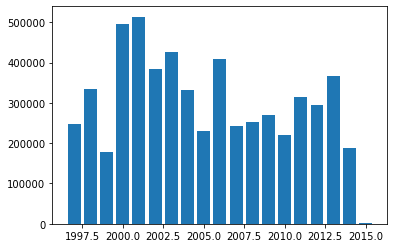

In [44]:
plt.bar(millets_df_yearly.Crop_Year,millets_df_yearly.Production)

<BarContainer object of 19 artists>

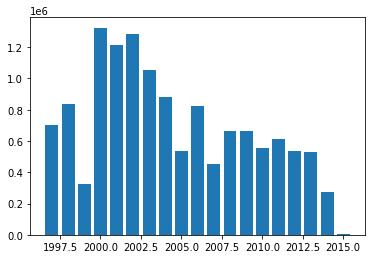

In [45]:
plt.bar(millets_df_yearly.Crop_Year,millets_df_yearly.Area)

In [47]:
millets_df.sort_values('Production',ascending=False).head(40)

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
109270,Madhya Pradesh,DINDORI,2013,Kharif,Small millets,38274.0,33811.0
184662,Tamil Nadu,SALEM,1998,Kharif,Small millets,59900.0,28000.0
132686,Maharashtra,NASHIK,1999,Kharif,Small millets,37400.0,26800.0
123340,Madhya Pradesh,SINGRAULI,2013,Kharif,Small millets,27117.0,25887.0
132718,Maharashtra,NASHIK,2000,Kharif,Small millets,42100.0,24800.0
235368,Uttarakhand,TEHRI GARHWAL,2000,Kharif,Small millets,21097.0,24628.0
190763,Tamil Nadu,VIRUDHUNAGAR,1998,Kharif,Small millets,50700.0,24600.0
178605,Tamil Nadu,CUDDALORE,2006,Kharif,Small millets,6812.0,24369.0
122842,Madhya Pradesh,SIDHI,2003,Kharif,Small millets,64899.0,24140.0
235703,Uttarakhand,TEHRI GARHWAL,2014,Kharif,Small millets,15909.0,24118.0


In [50]:
df_grouped_2=df.groupby(['State_Name','District_Name','Crop_Year','Season','Crop']).sum()

In [52]:
df_grouped_2.head(30)

Area  \
State_Name                  District_Name Crop_Year Season      Crop                           
Andaman and Nicobar Islands NICOBARS      2000      Kharif      Arecanut              1254.0   
                                                                Other Kharif pulses      2.0   
                                                                Rice                   102.0   
                                                    Whole Year  Banana                 176.0   
                                                                Cashewnut              720.0   
                                                                Coconut              18168.0   
                                                                Dry ginger              36.0   
                                                                Sugarcane                1.0   
                                                                Sweet potato             5.0   
                                                                Tapioca                 40.0   
                                          2001      Kharif      Arecanut              1254.0   
                                                                Other Kharif pulses      2.0   
                                                                Rice                    83.0   
                                                    Whole Year  Cashewnut              719.0   
                                                                Coconut              18190.0   
                                                                Dry ginger              46.0   
                                                                Sugarcane                1.0   
                                                                Sweet potato            11.0   
                                          2002      Kharif      Rice                   189.2   
                                                    Whole Year  Arecanut              1258.0   
                                                                Banana                 213.0   
                                                                Black pepper            63.0   
                                                                Cashewnut              719.0   
                                                                Coconut              18240.0   
                                                                Dry chillies           413.0   
                                                                Dry ginger              47.3   
                                                                Sugarcane                5.0   
                                          2003      Kharif      Rice                    52.0   
                                                    Whole Year  Arecanut              1261.0   
                                                                Banana                 266.0   

                                                                                      Production  
State_Name                  District_Name Crop_Year Season      Crop                              
Andaman and Nicobar Islands NICOBARS      2000      Kharif      Arecanut                 2000.00  
                                                                Other Kharif pulses         1.00  
                                                                Rice                      321.00  
                                                    Whole Year  Banana                    641.00  
                                                                Cashewnut                 165.00  
                                                                Coconut              65100000.00  
                                                                Dry ginger                100.00  
                                                                Sugarcane                   2.00  
                         

In [54]:
crop_df=df.groupby(['Crop_Year','Crop']).sum()

In [56]:
crop_df.head(30)

Area  Production
Crop_Year Crop                                     
1997      Arecanut             260686.0    308584.0
          Arhar/Tur           3325278.0   1693632.0
          Bajra               9527424.0   7622765.0
          Banana               216302.0   8577683.0
          Barley               772715.0   1586845.0
          Black pepper         181126.0     57204.0
          Cardamom              29168.0      1701.0
          Cashewnut            178834.0     93512.0
          Castor seed          582573.0    784499.0
          Coconut             1064229.0   6344142.0
          Coriander             57930.0     13169.0
          Cotton(lint)        5230253.0  10443524.0
          Dry chillies         536530.0    618764.0
          Dry ginger            12119.0     69027.0
          Garlic                28730.0    146910.0
          Gram                4585523.0   3540892.0
          Groundnut           6480853.0   6749962.0
          Horse-gram           657910.0    285294.0
          Jowar              10699683.0   7675581.0
          Jute                 979700.0   9937985.0
          Kapas                   967.0       429.0
          Khesari               25261.0     28460.0
          Korra                 30000.0     19200.0
          Linseed              428252.0    159224.0
          Maize               5644113.0   9797054.0
          Masoor               544987.0    391681.0
          Mesta                125033.0    830152.0
          Moong(Green Gram)   1531709.0    574384.0
          Moth                  48716.0     24216.0
          Niger seed            16810.0      8841.0